# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
df_tesla.shape

(124, 3)

In [4]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [5]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [6]:
print(df_tesla['TSLA_WEB_SEARCH'].max())
print(df_tesla['TSLA_WEB_SEARCH'].min())

31
2


In [7]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [8]:
print(f'Largest value for Tesla in Web Search: ')
print(f'Smallest value for Tesla in Web Search: ')

Largest value for Tesla in Web Search: 
Smallest value for Tesla in Web Search: 


### Unemployment Data

In [9]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [10]:
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [11]:
df_unemployment.shape

(181, 3)

In [12]:
unemp_max = df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()
unemp_min = df_unemployment['UE_BENEFITS_WEB_SEARCH'].min()

In [13]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {unemp_max}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [14]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [15]:
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [16]:
df_btc_search.shape

(73, 2)

In [17]:
btc_search_max = df_btc_search['BTC_NEWS_SEARCH'].max()

In [18]:
print(f'largest BTC News Search: {btc_search_max}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [19]:
print(df_tesla.isnull())
print(df_unemployment.isnull())
print(df_btc_search.isnull())

     MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0    False            False           False
1    False            False           False
2    False            False           False
3    False            False           False
4    False            False           False
..     ...              ...             ...
119  False            False           False
120  False            False           False
121  False            False           False
122  False            False           False
123  False            False           False

[124 rows x 3 columns]
     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0    False                   False   False
1    False                   False   False
2    False                   False   False
3    False                   False   False
4    False                   False   False
..     ...                     ...     ...
176  False                   False   False
177  False                   False   False
178  False                   False   False
179  False        

In [20]:
print(df_tesla.isnull().sum())
print(df_unemployment.isnull().sum())
print(df_btc_search.isnull().sum())

MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64
MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64
MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64


In [21]:
print(df_tesla.isnull().sum().sum())
print(df_unemployment.isnull().sum().sum())
print(df_btc_search.isnull().sum().sum())

0
0
0


In [22]:
# Returns rows where any column is NaN
tesla_rows_with_nan = df_tesla[df_tesla.isnull().any(axis=1)]
print(tesla_rows_with_nan)

Empty DataFrame
Columns: [MONTH, TSLA_WEB_SEARCH, TSLA_USD_CLOSE]
Index: []


**Why `axis=1` matters?**

If you used `axis=0` (or left it default), it would check down the columns and tell you which columns have missing data, rather than which rows. Since you want to extract specific rows to inspect them, `axis=1` is required.

In [23]:
# Returns rows where any column is NaN
unemployment_rows_with_nan = df_unemployment[df_unemployment.isnull().any(axis=1)]
print(unemployment_rows_with_nan)

Empty DataFrame
Columns: [MONTH, UE_BENEFITS_WEB_SEARCH, UNRATE]
Index: []


In [24]:
btc_search_rows_with_nan = df_btc_search[df_btc_search.isnull().any(axis=1)]
print(btc_search_rows_with_nan)

Empty DataFrame
Columns: [MONTH, BTC_NEWS_SEARCH]
Index: []


In [25]:
print(f'Missing values for Tesla?: ')
print(f'Missing values for U/E?: ')
print(f'Missing values for BTC Search?: ')

Missing values for Tesla?: 
Missing values for U/E?: 
Missing values for BTC Search?: 


In [26]:
df_btc_price.isnull().sum()

DATE      0
CLOSE     1
VOLUME    1
dtype: int64

In [27]:
btc_price_rows_with_nan = df_btc_price[df_btc_price.isnull().any(axis=1)]
print(btc_price_rows_with_nan)

            DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN


In [28]:
print(f'Missing values for BTC price?: \n{btc_price_rows_with_nan} ')

Missing values for BTC price?: 
            DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN 


In [29]:
print(f'Number of missing values: {df_btc_price.isnull().sum().sum()} ')

Number of missing values: 2 


**Challenge**: Remove any missing values that you found. 

In [30]:
df_clean_btc_price = df_btc_price.dropna()

In [31]:
df_clean_btc_price

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [32]:
df_btc_price.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

In [33]:
df_btc_price['DATE']

0       2014-09-17
1       2014-09-18
2       2014-09-19
3       2014-09-20
4       2014-09-21
           ...    
2199    2020-09-24
2200    2020-09-25
2201    2020-09-26
2202    2020-09-27
2203    2020-09-28
Name: DATE, Length: 2204, dtype: object

In [34]:
type(df_btc_price['DATE'][0])

str

In [35]:
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

In [36]:
type(df_btc_price.head()['DATE'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [37]:
print(df_btc_price.dtypes)

DATE      datetime64[ns]
CLOSE            float64
VOLUME           float64
dtype: object


In [38]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [39]:
type(df_btc_search['MONTH'][0])

str

In [40]:
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])

In [41]:
df_btc_search

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5
...,...,...
68,2020-05-01,22
69,2020-06-01,13
70,2020-07-01,14
71,2020-08-01,16


In [42]:
type(df_btc_search['MONTH'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [43]:
df_clean_btc_price.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

In [44]:
print(df_clean_btc_price.dtypes)

DATE       object
CLOSE     float64
VOLUME    float64
dtype: object


In [45]:
df_tesla.dtypes

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object

In [46]:
type(df_tesla['MONTH'][0])

str

In [47]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [48]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])

In [49]:
df_tesla.dtypes

MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object

In [50]:
df_unemployment.dtypes

MONTH                      object
UE_BENEFITS_WEB_SEARCH      int64
UNRATE                    float64
dtype: object

In [51]:
df_unemployment.head()


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [52]:
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

In [53]:
df_unemployment.dtypes

MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [54]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [55]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


In [56]:
df_clean_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [57]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [58]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


To convert our daily data into monthly data, we're going to use the `.resample()` function. The only things we need to specify is which column to use (i.e., our `DATE` column) and what kind of sample frequency we want (i.e., the "`rule`").

We want a monthly frequency, so we use `'M'`.  If you ever need to resample a time series to a different frequency, you can find a list of different options here (for example '`Y`' for yearly or '`T`' for minute).

After resampling, we need to figure out how the data should be treated. In our case, we want the last available price of the month - the price at month-end.

```
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
```
If we wanted the average price over the course of the month, we could use something like:
```
df_btc_monthly = df_btc_price.resample('M', on='DATE').mean(
```

In [59]:
# Only do resampling for df_clean_btc_price
# df_clean_btc_price = df_clean_btc_price.resample('MS',on='DATE').last()

In [60]:
df_clean_btc_price = df_clean_btc_price.copy()

In [61]:
df_clean_btc_price['DATE'] = pd.to_datetime(df_clean_btc_price['DATE'])

In [62]:
df_clean_btc_monthly_price = df_clean_btc_price.resample('MS',on='DATE').last()

In [63]:
df_clean_btc_monthly_price

,CLOSE,VOLUME
DATE,,
2014-09-01,386.944000,3.470730e+07
2014-10-01,338.321014,1.254540e+07
2014-11-01,378.046997,9.194440e+06
2014-12-01,320.192993,1.394290e+07
2015-01-01,217.464005,2.334820e+07
...,...,...
2020-05-01,9461.058594,2.777329e+10
2020-06-01,9137.993164,1.573580e+10
2020-07-01,11323.466797,2.316047e+10


# Data Visualisation

### Notebook Formatting & Style Helpers

In [64]:
# Create locators for ticks on the time axis

In [65]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

In [66]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

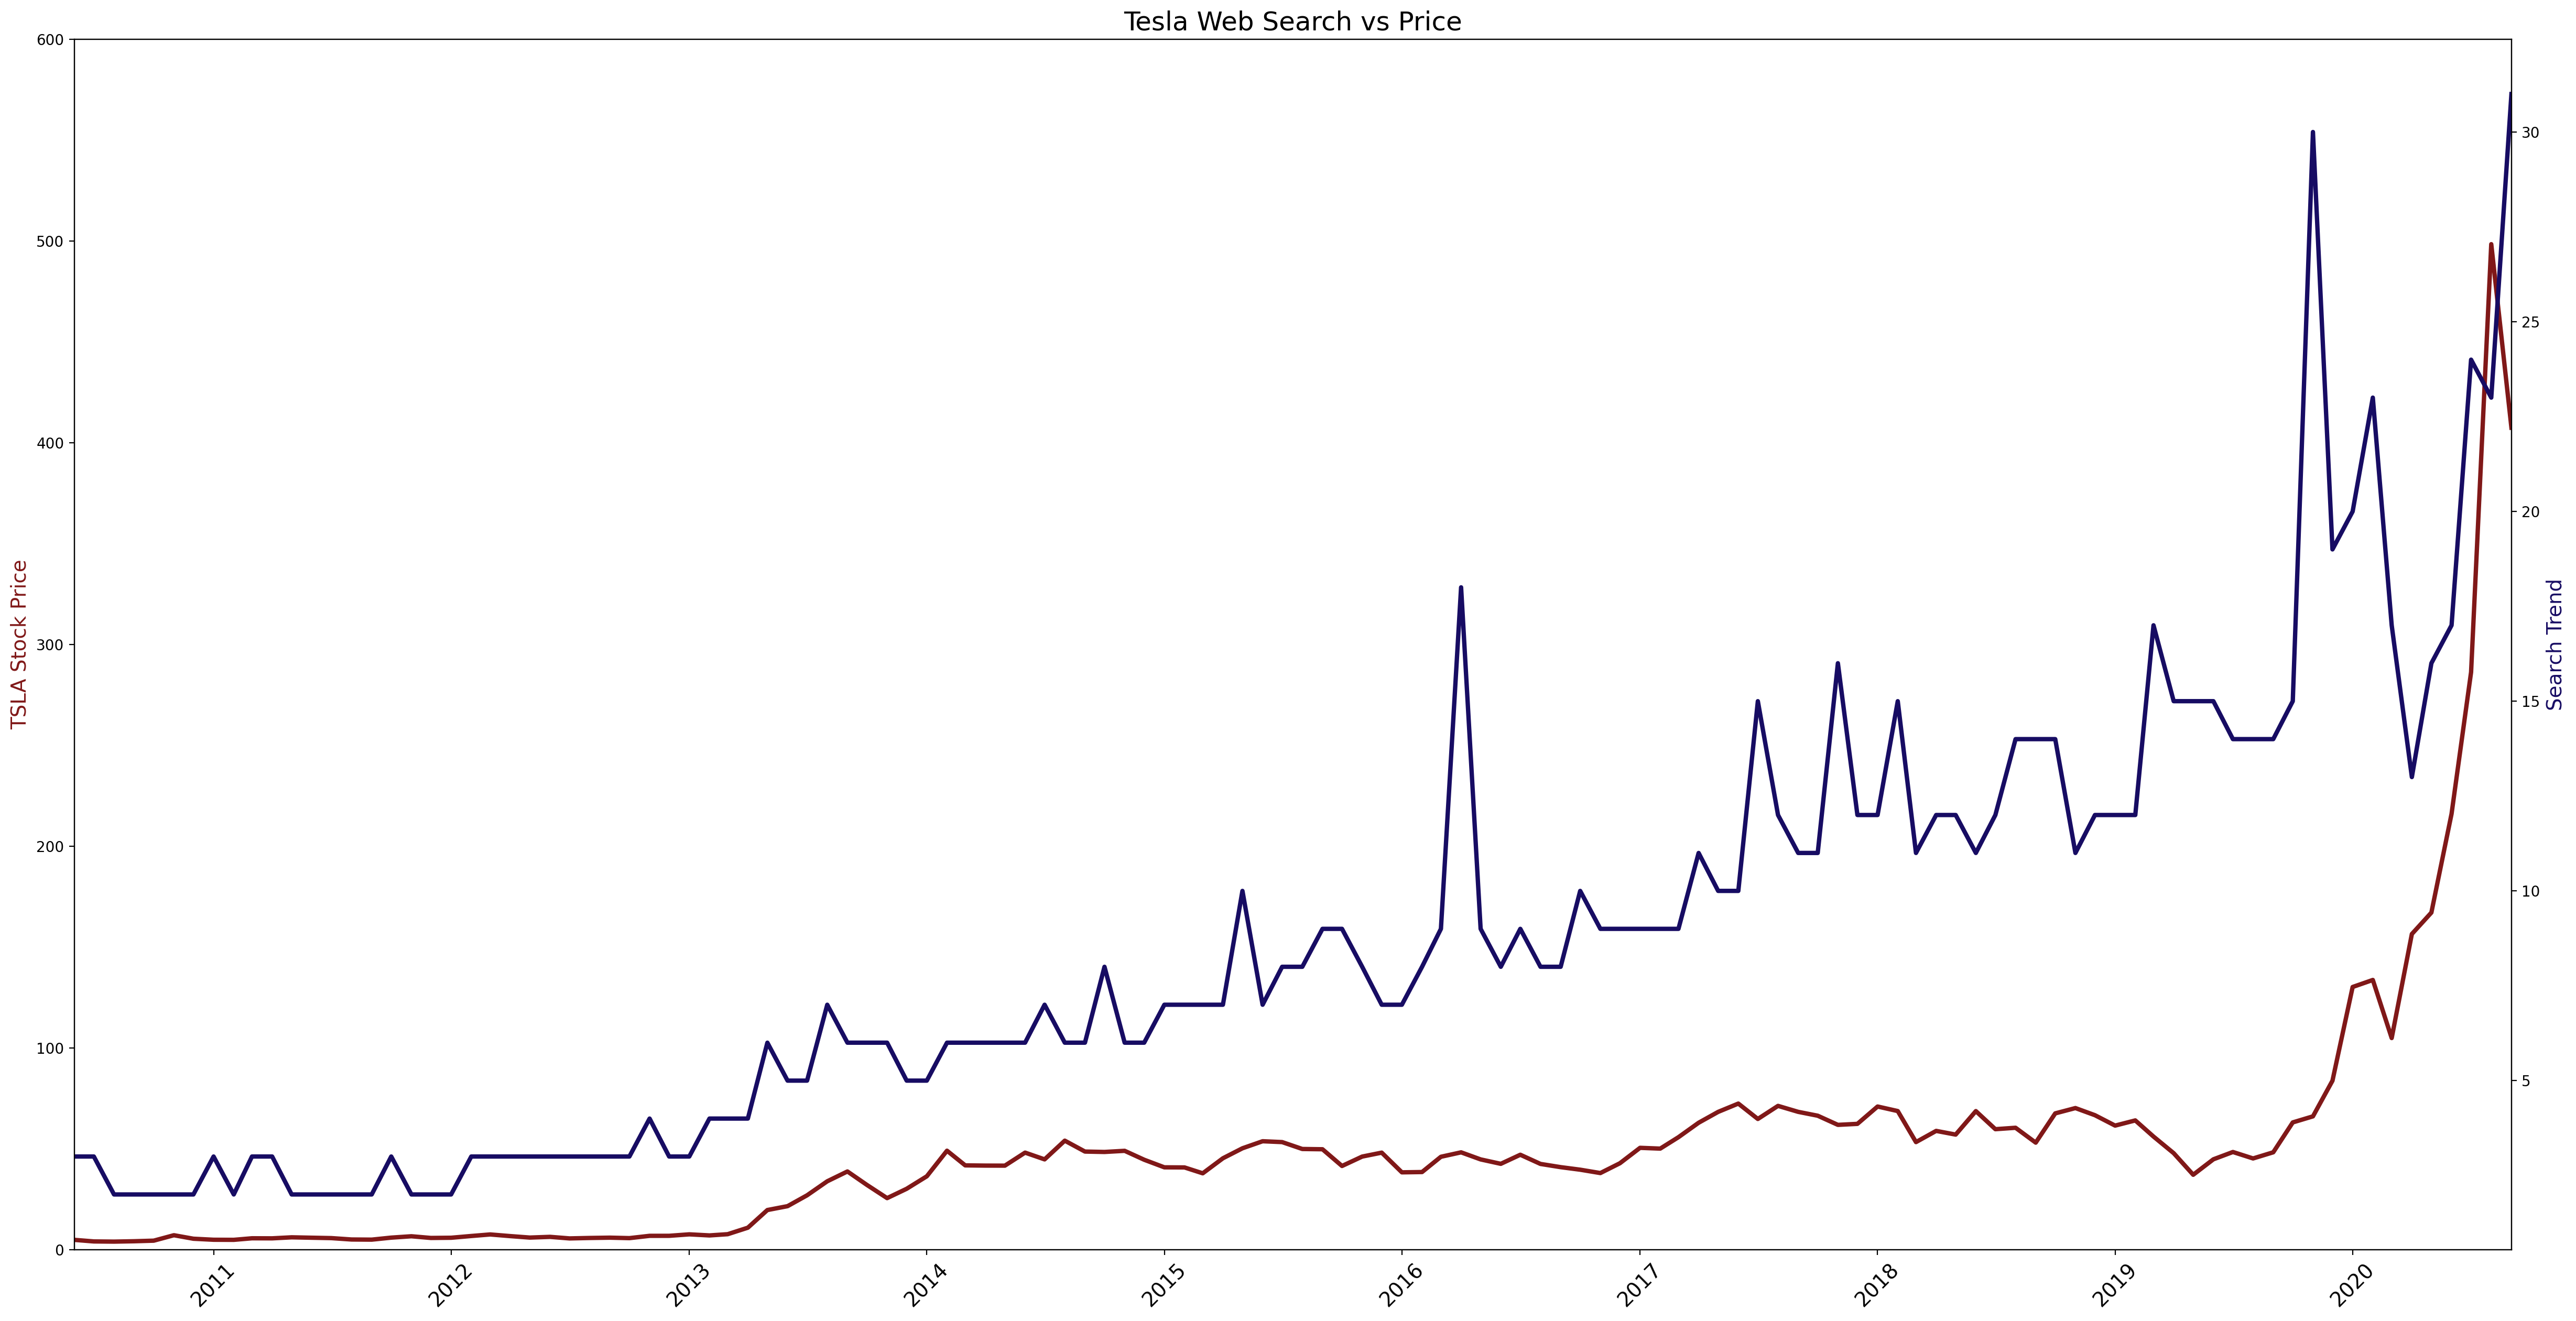

In [85]:
# This bit should pretty much be review from the previous days' lessons. To create a line plot with two different y-axes we first have to get the current axis and make a copy of it using `.twinx()`. Then we can configure each axis separately and call `.plot()`.



plt.figure(figsize=(30,15), dpi =200 )
plt.title('Tesla Web Search vs Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price", color = '#801818', fontsize=14)
ax2.set_ylabel('Search Trend', color = '#170C63', fontsize = 14)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color ='#801818',linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='#170C63',linewidth=3)
# plt.legend()

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis. 

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [86]:
df_clean_btc_monthly_price.columns

Index(['CLOSE', 'VOLUME'], dtype='object')

In [87]:
df_clean_btc_monthly_price.head()

,CLOSE,VOLUME
DATE,,
2014-09-01,386.944000,34707300.0
2014-10-01,338.321014,12545400.0
2014-11-01,378.046997,9194440.0
2014-12-01,320.192993,13942900.0
2015-01-01,217.464005,23348200.0


In [88]:
df_clean_btc_monthly_price.index

DatetimeIndex(['2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
      

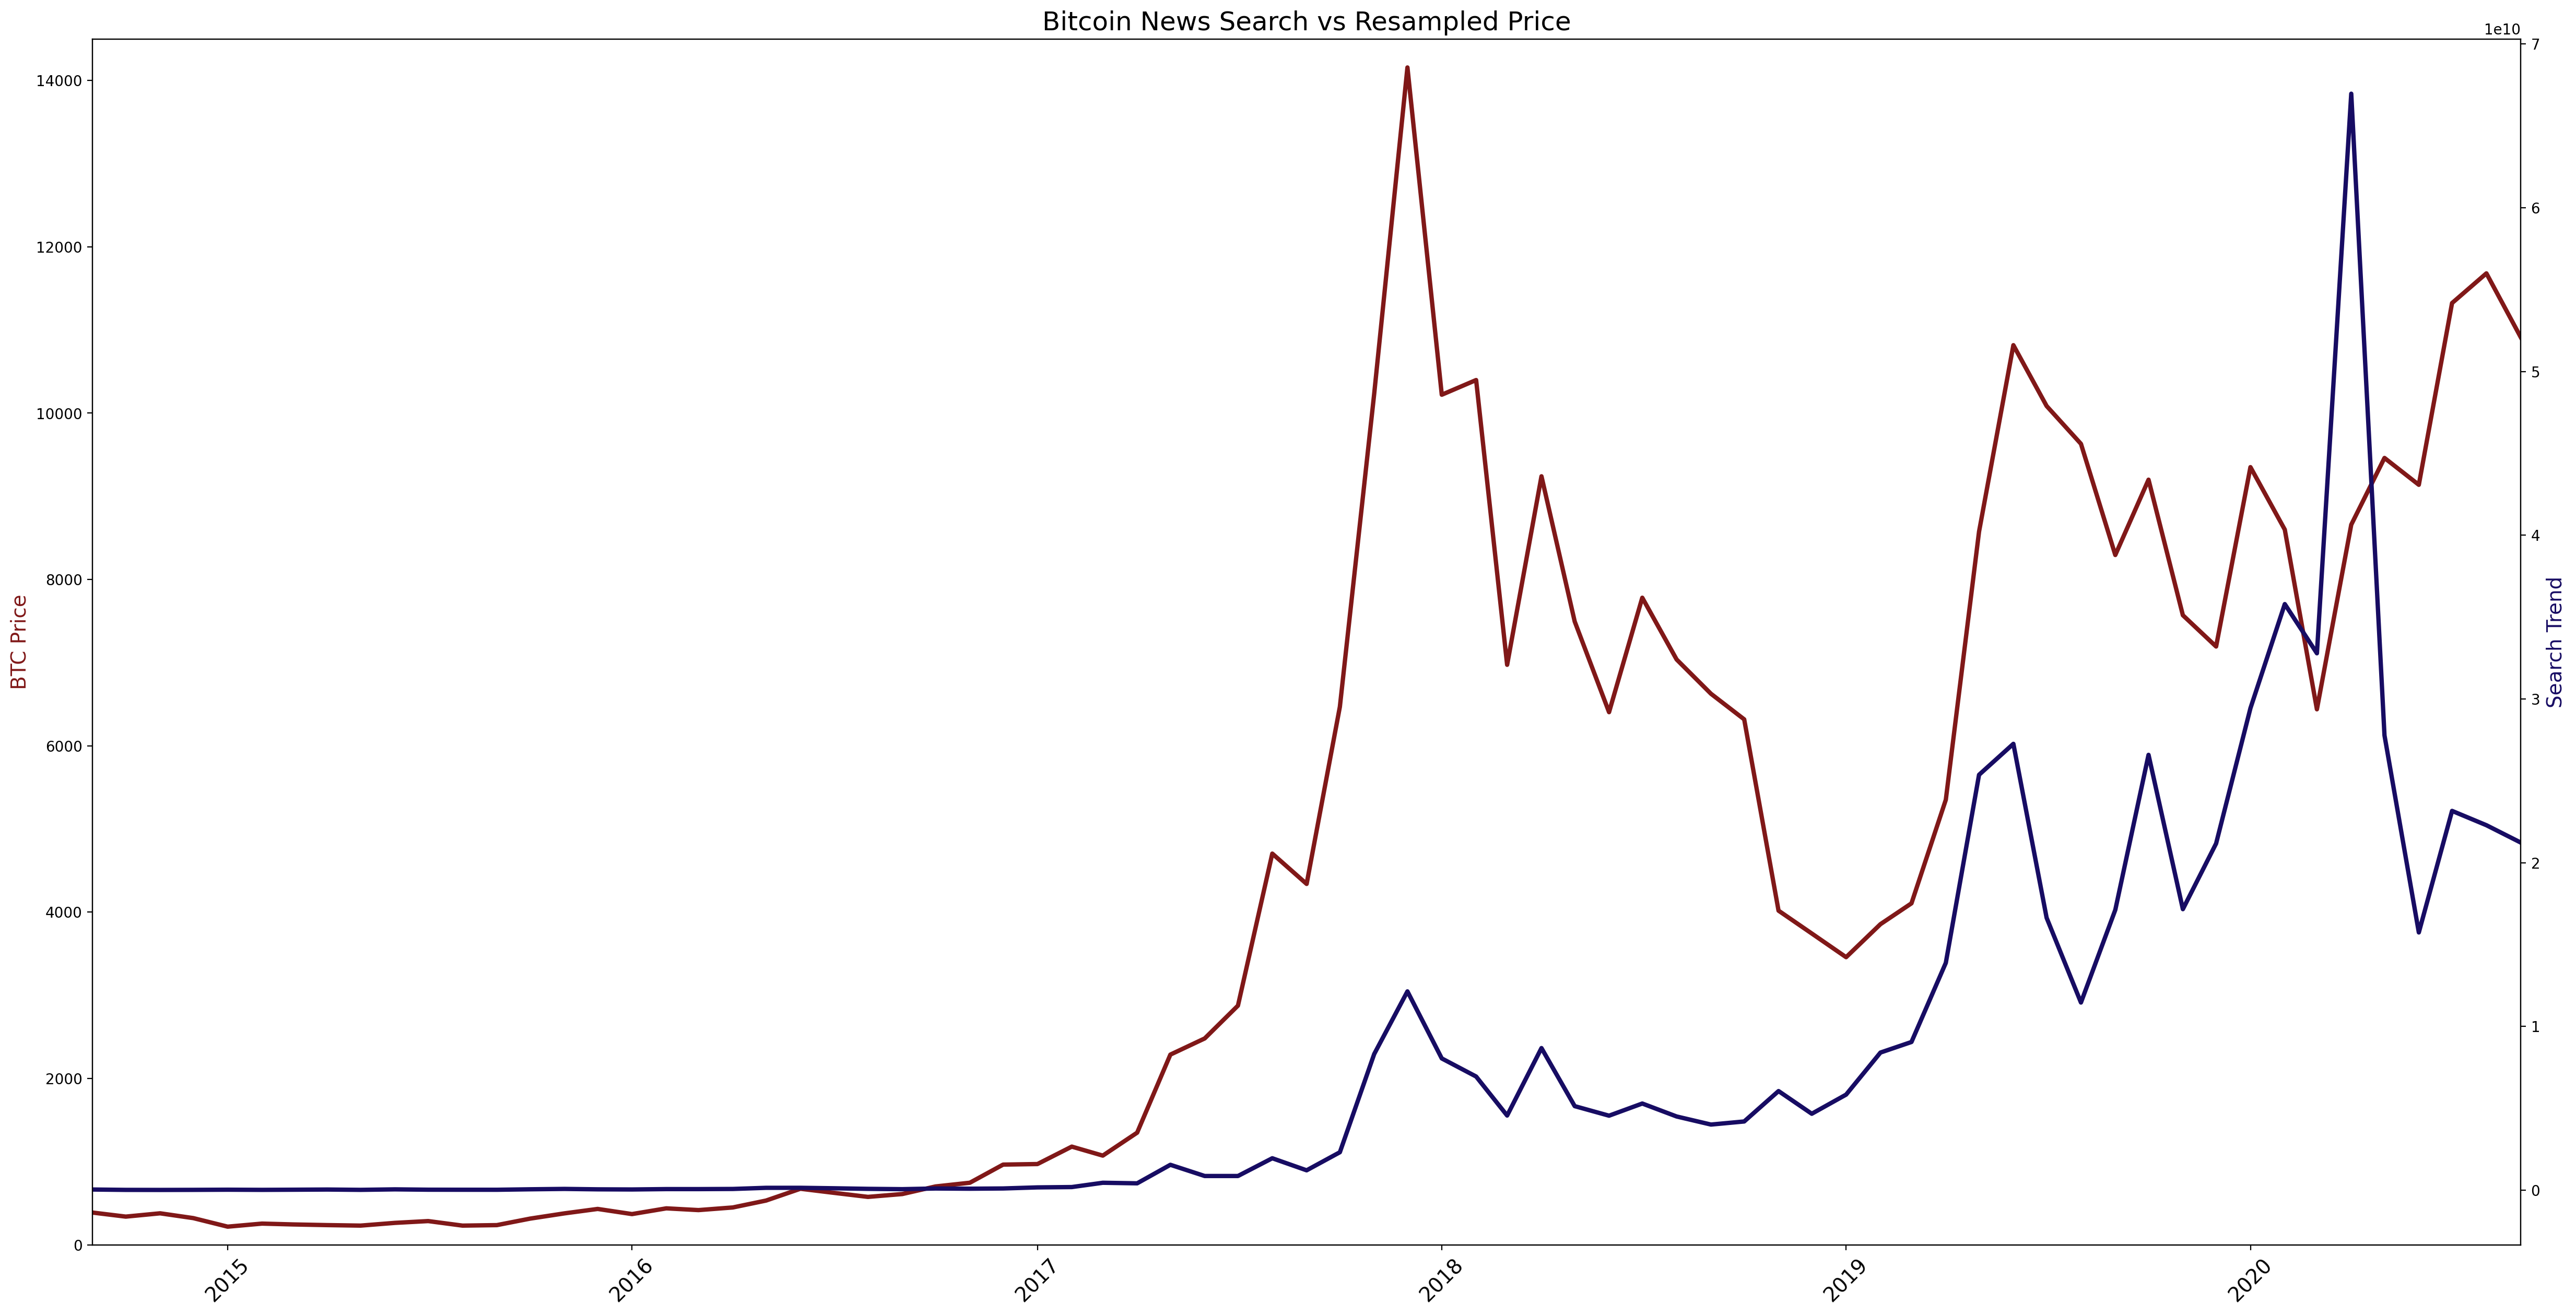

In [96]:

plt.figure(figsize=(30,15), dpi =200 )
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("BTC Price", color = '#801818', fontsize=14)
ax2.set_ylabel('Search Trend', color = '#170C63', fontsize = 14)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 14500])
ax1.set_xlim([df_clean_btc_monthly_price.index.min(), df_clean_btc_monthly_price.index.max()])

ax1.plot(df_clean_btc_monthly_price.index, df_clean_btc_monthly_price['CLOSE'], color ='#801818',linewidth=3)
ax2.plot(df_clean_btc_monthly_price.index, df_clean_btc_monthly_price['VOLUME'], color='#170C63',linewidth=3)
# plt.legend()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [106]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=3).mean()

### Using Locators and DateFormatters to generate Tick Marks on a Time Line

Adding Locator Tick Marks
When working with time series, it's often quite difficult to get the tick marks on charts looking the way you want to. This is why we have Locator helpers.

Using Locators we can change our x-axis from looking like this:

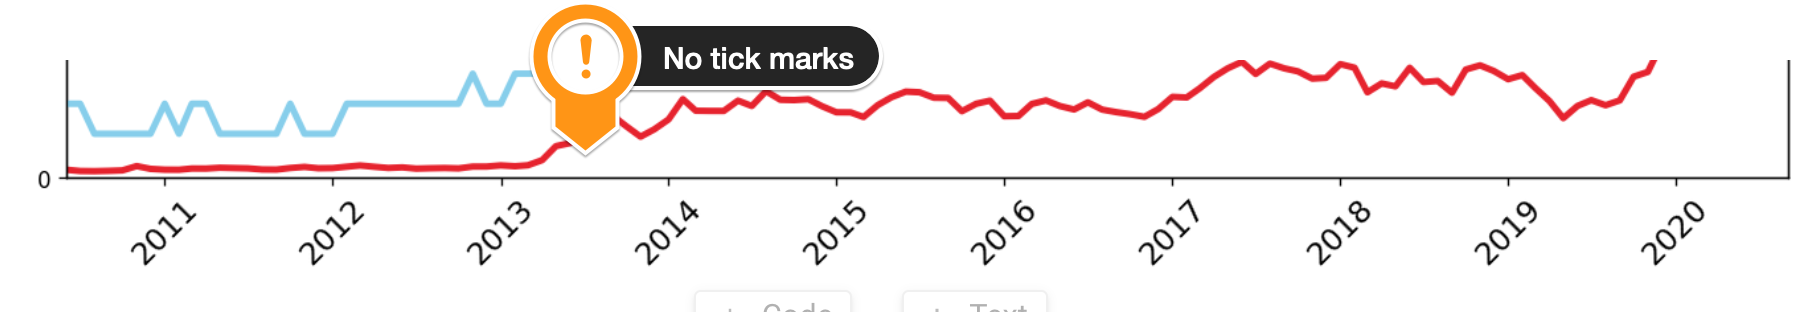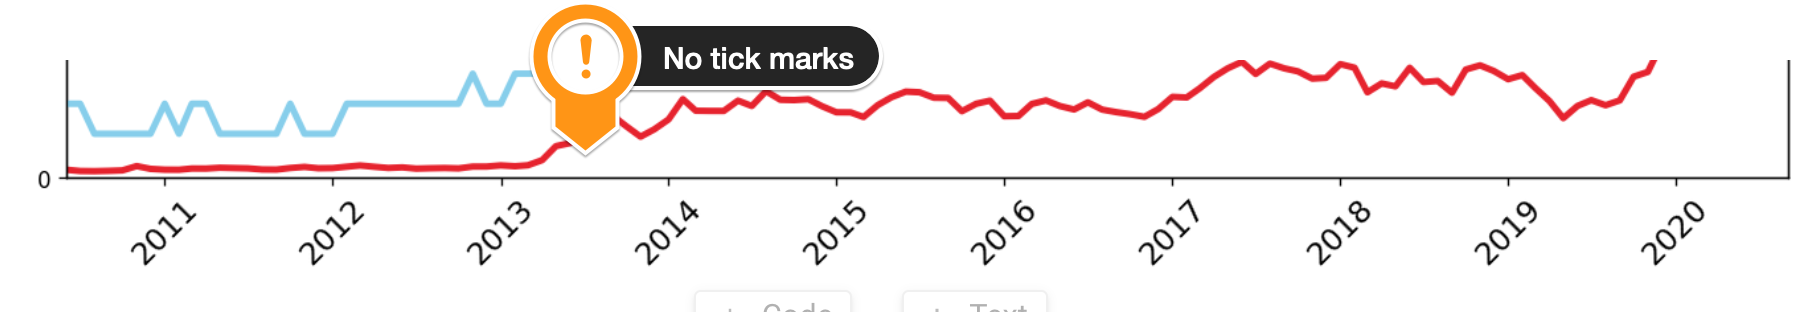

to looking like this:

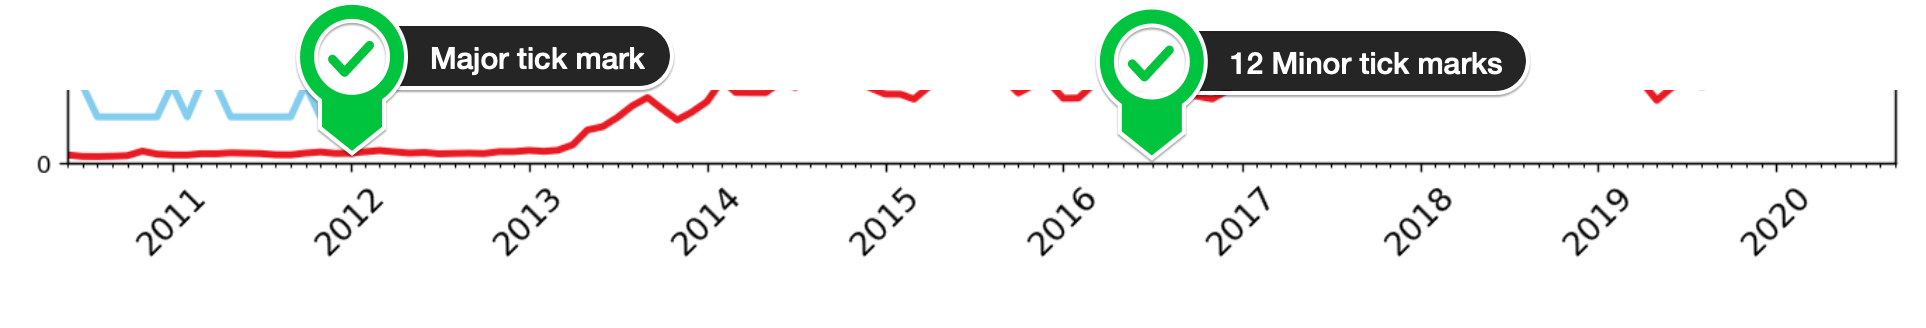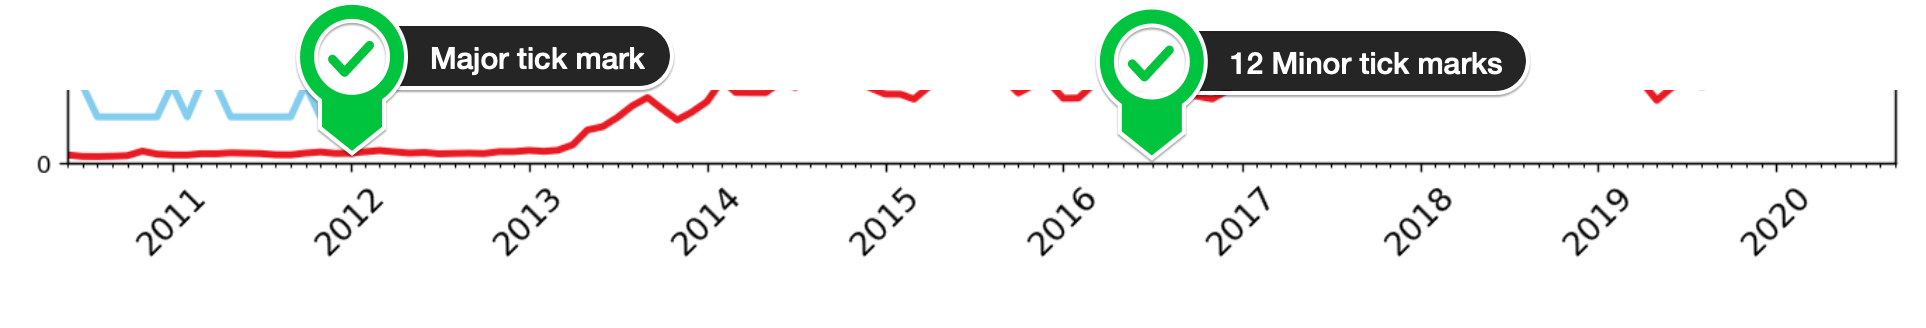

In [108]:
import matplotlib.dates as mdates

Next, we need a `YearLocator()` and a `MonthLocator()` objects, which will help Matplotlib find the years and the months. Then we also need a `DateFormatter()`, which will help us specify how we want to display the dates.

In [109]:
# Create locators for ticks on the time axis

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

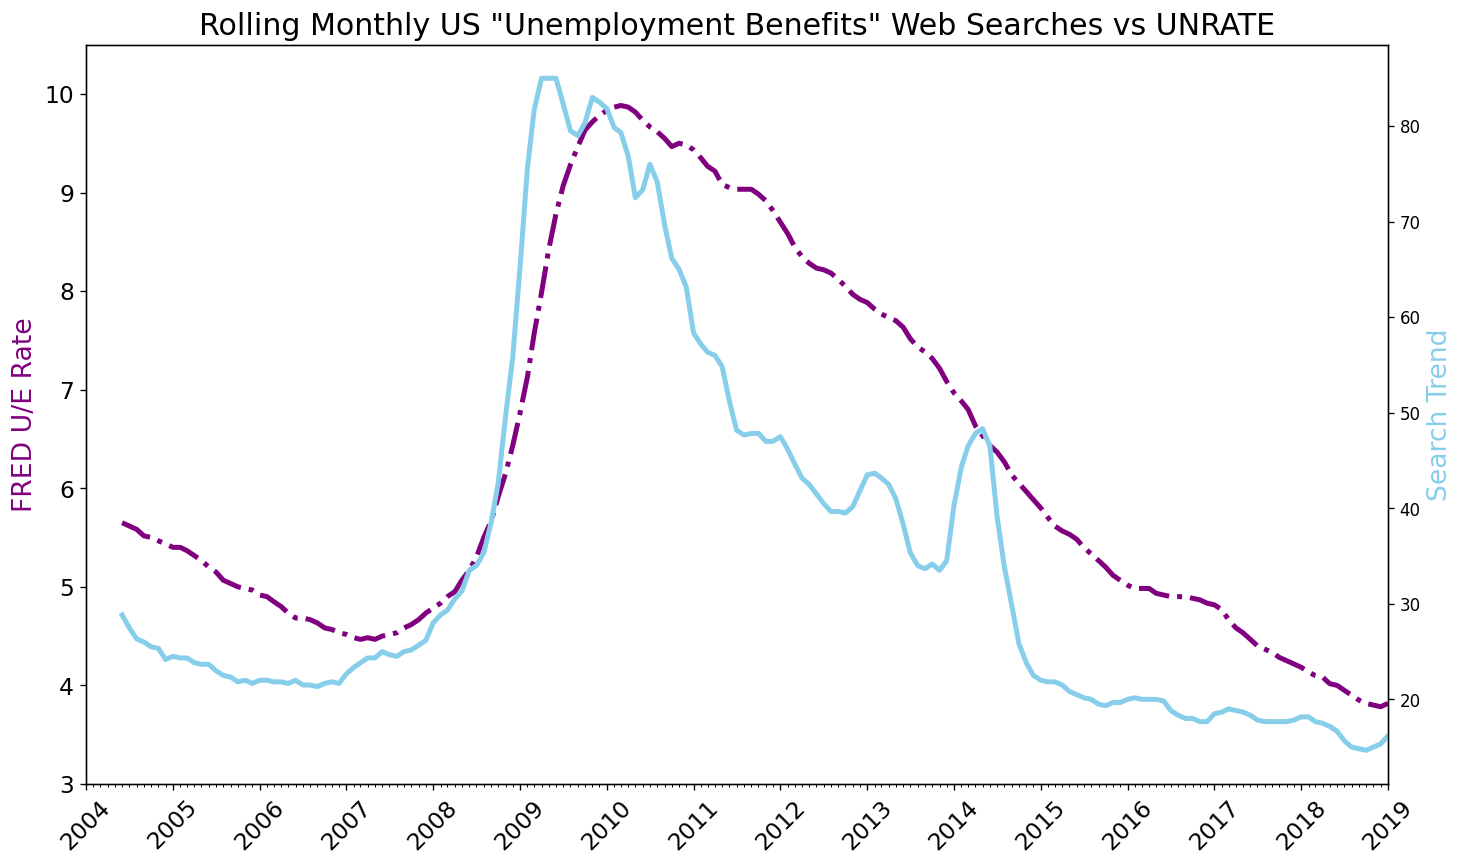

In [110]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])
 
# Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
 
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [98]:
df_UE = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [99]:
df_UE.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [100]:
df_UE['MONTH'] = pd.to_datetime(df_UE['MONTH'])

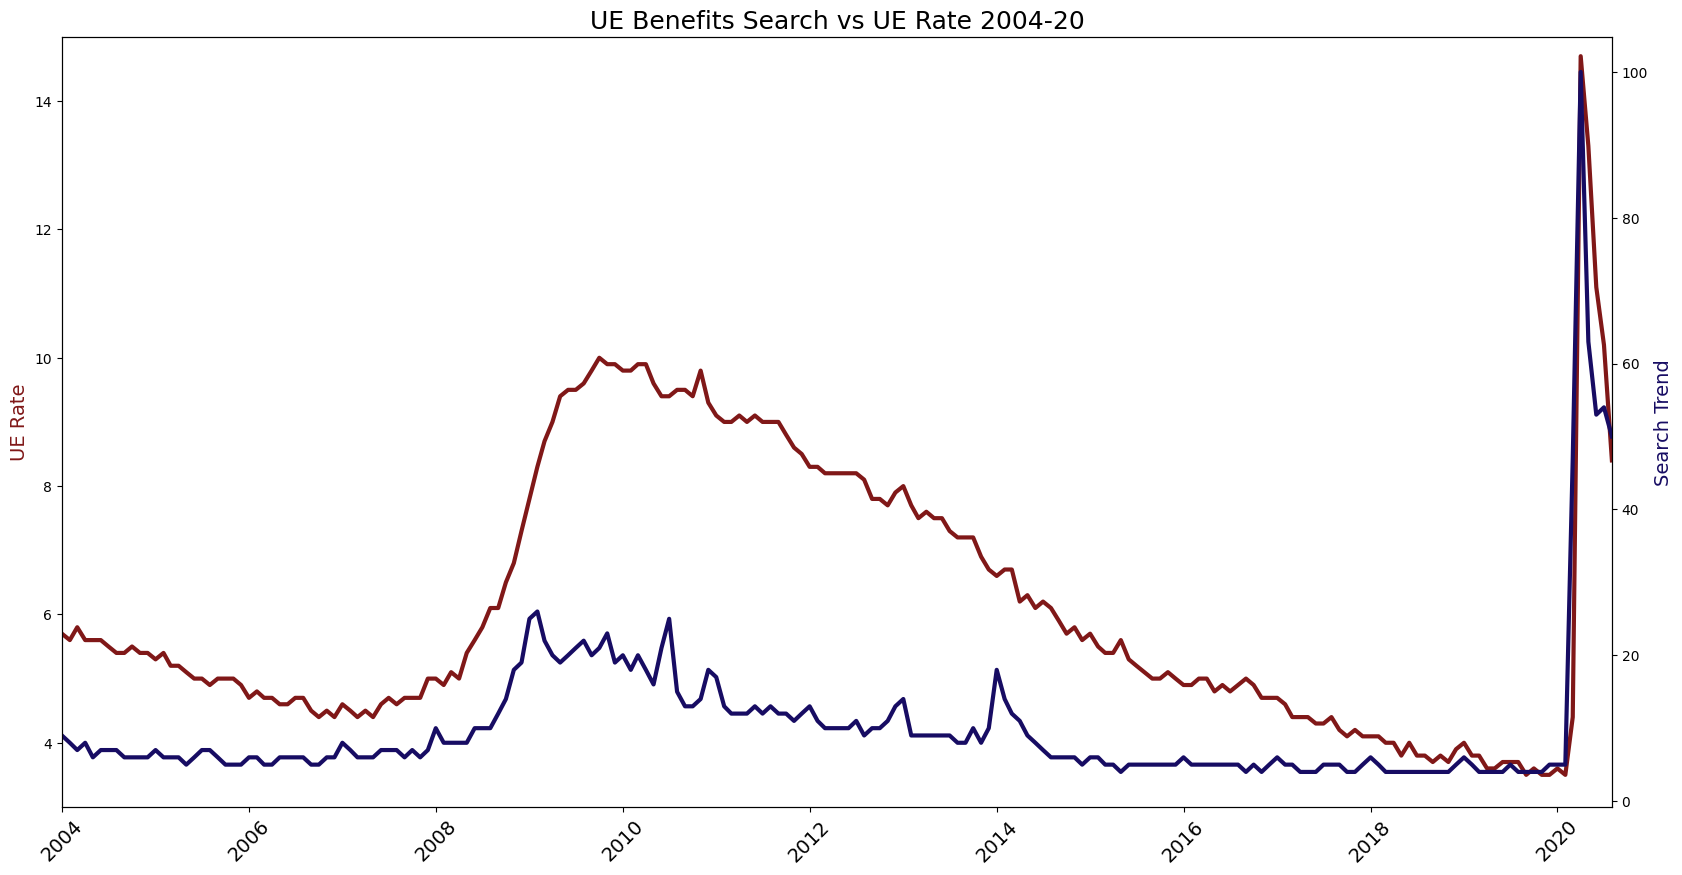

In [104]:

plt.figure(figsize=(20,10), dpi =100 )
plt.title('UE Benefits Search vs UE Rate 2004-20', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("UE Rate", color = '#801818', fontsize=14)
ax2.set_ylabel('Search Trend', color = '#170C63', fontsize = 14)

# Set the minimum and maximum values on the axes
ax1.set_ylim([3, 15])
ax1.set_xlim([df_UE['MONTH'].min(), df_UE['MONTH'].max()])

ax1.plot(df_UE['MONTH'], df_UE['UNRATE'], color ='#801818',linewidth=3)
ax2.plot(df_UE['MONTH'], df_UE['UE_BENEFITS_WEB_SEARCH'], color='#170C63',linewidth=3)